In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('/Users/minghongsun/Desktop/model/')
from my_functions import *
import warnings

import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression




In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Hiragino Sans GB'
plt.rcParams['axes.unicode_minus']=False 

In [3]:
industries_lis = ['Ｅ２５はん用機械器具製造業','Ｅ２６生産用機械器具製造業','Ｅ２７業務用機械器具製造業','Ｅ２８電子部品・デバイス・電子回路製造業','Ｅ２９電気機械器具製造業','Ｅ３０情報通信機械器具製造業','Ｅ３１輸送用機械器具製造業']

In [4]:
data_lis = []
for item in industries_lis:
    df_lis = data_read(item)
    data = data_preprosessing(df_lis)
    mul_index = data[data['勤続年数']=='-'].groupby(['学历年龄','year','education','sex']).mean().index
    data = fill_null_data(mul_index,data)
    data_lis.append(data)

****************************************************************************************************
Paragrams for filling null data:
--------------------------------------------------
学历年龄 : ２０～２４歳
Sex:0
Education year:9
Year of filling null data:[2011, 2018]
--------------------------------------------------
Fill value is :[ 22.8875   3.075  171.75    29.375  179.0375 145.5125  94.2625   3.625 ]
--------------------------------------------------
index location of filling null data:Int64Index([160], dtype='int64')
****************************************************************************************************
Paragrams for filling null data:
--------------------------------------------------
学历年龄 : ２０～２４歳
Sex:0
Education year:9
Year of filling null data:[2011, 2018]
--------------------------------------------------
Fill value is :[ 22.8875   3.075  171.75    29.375  179.0375 145.5125  94.2625   3.625 ]
--------------------------------------------------
index location of filling n

****************************************************************************************************
Paragrams for filling null data:
--------------------------------------------------
学历年龄 : ２０～２４歳
Sex:1
Education year:9
Year of filling null data:[2017]
--------------------------------------------------
Fill value is :[ 22.73333333   2.91111111 162.88888889  21.22222222 212.1
 176.62222222 139.84444444  18.        ]
--------------------------------------------------
index location of filling null data:Int64Index([512], dtype='int64')
****************************************************************************************************
Paragrams for filling null data:
--------------------------------------------------
学历年龄 : ２０～２４歳
Sex:0
Education year:9
Year of filling null data:[2016]
--------------------------------------------------
Fill value is :[ 22.71111111   1.41111111 159.          23.33333333 190.61111111
 158.12222222  65.11111111  25.22222222]
-------------------------------

In [5]:
length = len(data_lis)
length

7

In [6]:
data = data_lis[0]

In [7]:

for i in range(1,length):
    data = data+ data_lis[i]


In [8]:
data = data.iloc[:,1:]/length

In [9]:
data = data.astype(np.float64)

In [10]:
data.describe()

,年齢,勤続年数,所定内実労働時間数,超過実労働時間数,きまって支給する現金給与額(千円),所定内給与額(千円),年間賞与その他特別給与額(千円),労働者数(十人),year,education,sex
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,40.053281,13.278542,162.590371,14.924616,309.565366,278.746057,923.574167,538.063728,2013.500000,12.750000,0.500000
std,11.351621,8.223046,2.878779,6.663045,95.965092,92.656992,534.429163,670.682715,2.874528,2.588043,0.500391
min,21.928571,1.128571,154.142857,2.428571,157.042857,138.885714,24.373016,6.142857,2009.000000,9.000000,0.000000
25%,31.035714,6.339286,160.821429,9.857143,233.442857,210.646429,549.829762,84.071429,2011.000000,11.250000,0.000000
50%,39.971429,12.342857,162.571429,13.142857,285.014286,249.642857,791.907143,211.214286,2013.500000,13.000000,0.500000
75%,48.917857,19.678571,164.285714,20.571429,380.317857,338.017857,1237.492857,663.071429,2016.000000,14.500000,1.000000
max,58.428571,35.571429,173.857143,37.714286,573.471429,551.828571,2712.042857,2826.000000,2018.000000,16.000000,1.000000


In [11]:
df = pd.read_excel('/Users/minghongsun/Desktop/model/09-18data/各种工业表.xlsx',sheet_name='機械工業')

In [12]:
data = pd.merge(left = data,right = df,on = 'year',how = 'outer')

In [13]:
data

,年齢,勤続年数,所定内実労働時間数,超過実労働時間数,きまって支給する現金給与額(千円),所定内給与額(千円),年間賞与その他特別給与額(千円),労働者数(十人),year,education,sex,出荷额,中间投入,資本サービス投入指数
0,22.957143,2.842857,160.142857,16.428571,231.328571,207.514286,341.700000,72.428571,2009.0,9.0,1.0,15609675,9174209,1.036501
1,27.357143,3.985714,156.571429,15.571429,242.200000,213.300000,411.428571,88.428571,2009.0,9.0,1.0,15609675,9174209,1.036501
2,32.700000,6.785714,163.428571,17.571429,273.485714,240.257143,561.928571,97.714286,2009.0,9.0,1.0,15609675,9174209,1.036501
3,37.514286,10.914286,161.285714,16.428571,302.985714,267.442857,737.714286,141.285714,2009.0,9.0,1.0,15609675,9174209,1.036501
4,42.585714,13.528571,161.714286,16.285714,302.757143,266.114286,778.600000,115.142857,2009.0,9.0,1.0,15609675,9174209,1.036501
5,47.728571,21.885714,161.142857,13.000000,348.642857,315.400000,1006.771429,116.428571,2009.0,9.0,1.0,15609675,9174209,1.036501
6,52.900000,29.214286,161.857143,9.000000,356.285714,330.185714,1281.685714,226.857143,2009.0,9.0,1.0,15609675,9174209,1.036501
7,57.785714,33.114286,159.142857,9.000000,386.214286,359.485714,1488.871429,540.000000,2009.0,9.0,1.0,15609675,9174209,1.036501
8,22.442857,3.257143,161.857143,13.285714,210.785714,186.942857,594.928571,1511.571429,2009.0,12.0,1.0,15609675,9174209,1.036501
9,27.628571,5.757143,161.000000,15.142857,243.500000,214.985714,691.571429,1842.285714,2009.0,12.0,1.0,15609675,9174209,1.036501


In [14]:
len(data.columns)

14

In [15]:
data['ckb'] = data['資本サービス投入指数']

In [16]:
data['総労働時間'] = data['所定内実労働時間数'] + data['超過実労働時間数']

In [17]:
data['労働者給与'] = data['きまって支給する現金給与額(千円)'] *12 +data['年間賞与その他特別給与額(千円)']

In [18]:
data['勤続年数2乘'] = np.square(data['勤続年数'])

In [19]:
data = data.astype(np.float64)

In [20]:
data['実際中间投入'] = np.log(data['中间投入'])

In [21]:
data['自然対数出荷額'] = np.log(data['出荷额'])

In [22]:
data['自然対数労働者給与'] = np.log(data['労働者給与'])

In [23]:
hiseiki_rate = [0.31303063861203395,0.31942392909896605,0.3283230713509598,0.3437330928764653,0.35141424991049053,0.35120738636363635,0.35262237762237764,0.3506024096385542,0.3576851695630167]

In [24]:
year = [2009,2010,2012,2013,2014,2015,2016,2017,2018]


In [25]:
df = pd.DataFrame([year,hiseiki_rate],index = ['year','hiseiki']).T
df

,year,hiseiki
0,2009.0,0.313031
1,2010.0,0.319424
2,2012.0,0.328323
3,2013.0,0.343733
4,2014.0,0.351414
5,2015.0,0.351207
6,2016.0,0.352622
7,2017.0,0.350602
8,2018.0,0.357685


In [26]:
data = pd.merge(data,df,on='year')

In [27]:
round(data.describe(),2).iloc[[1,2],:]

,年齢,勤続年数,所定内実労働時間数,超過実労働時間数,きまって支給する現金給与額(千円),所定内給与額(千円),年間賞与その他特別給与額(千円),労働者数(十人),year,education,sex,出荷额,中间投入,資本サービス投入指数,ckb,総労働時間,労働者給与,勤続年数2乘,実際中间投入,自然対数出荷額,自然対数労働者給与,hiseiki
mean,40.05,13.26,162.33,14.91,309.64,278.72,930.71,538.46,2013.78,12.75,0.5,18196225.78,10427289.56,1.02,1.02,177.24,4646.42,243.26,16.16,16.71,8.38,0.34
std,11.35,8.22,2.82,6.68,95.54,92.11,539.50,670.10,2.90,2.59,0.5,1509943.38,802308.12,0.03,0.03,8.42,1667.34,255.76,0.08,0.08,0.34,0.02


In [28]:
male_data = data[data['sex']==1]


In [29]:
male_data.reset_index(drop = 'index',inplace=True)


In [30]:
female_data = data[data['sex'] ==0]

In [31]:
female_data.reset_index(inplace=True,drop = 'index')

# 女性モデル

In [32]:
y = female_data['自然対数出荷額']

In [33]:
feature  = female_data.loc[:,['勤続年数','勤続年数2乘','education','実際中间投入','ckb','総労働時間']]

In [34]:
feature = sm.add_constant(feature)

In [35]:
female_pro_res = sm.OLS(y,feature).fit()

In [36]:
female_pro_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                自然対数出荷額   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     3507.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          6.89e-261
Time:                        13:51:44   Log-Likelihood:                 931.16
No. Observations:                 288   AIC:                            -1848.
Df Residuals:                     281   BIC:                            -1823.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2413      0.149     -8.349      0.000      -1.534      -0.949
勤続年数          -0.0001      0.000     -0.361      0.718      -0.001       0.001
勤続年数2乘      7.209e-06   1.35e-05      0.533      0.594   -1.94e-05    3.38e-05
education   8.427e-05      0.000      0.331      0.741      -0.000       0.001
実際中间投入         1.1248      0.011    101.206      0.000       1.103       1.147
ckb           -0.2275      0.030     -7.679      0.000      -0.286      -0.169
総労働時間       7.692e-05      0.000      0.522      0.602      -0.000       0.000
==============================================================================
Omnibus:                       19.012   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.112
Skew:                           0.151   Prob(JB):                       0.0173
Kurtosis:                       2.235   Cond. No.                     7.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
y2 = female_data['自然対数労働者給与']
feature2 = female_data.loc[:,['勤続年数','勤続年数2乘','education']]
feature2 = sm.add_constant(feature2)
female_salary_res= sm.OLS(y2,feature2).fit()
female_salary_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              自然対数労働者給与   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     528.2
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          8.18e-116
Time:                        13:51:44   Log-Likelihood:                 244.87
No. Observations:                 288   AIC:                            -481.7
Df Residuals:                     284   BIC:                            -467.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9147      0.034    200.717      0.000       6.847       6.983
勤続年数           0.0370      0.004     10.308      0.000       0.030       0.044
勤続年数2乘        -0.0007      0.000     -5.027      0.000      -0.001      -0.000
education      0.0763      0.002     31.926      0.000       0.072       0.081
==============================================================================
Omnibus:                        7.312   Durbin-Watson:                   0.673
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.152
Skew:                           0.376   Prob(JB):                       0.0280
Kurtosis:                       3.173   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# コブダグラス係数(female)

In [38]:
y_c = female_data['自然対数出荷額']
feature_c = female_data.loc[:,['勤続年数','勤続年数2乘','education','実際中间投入','ckb','総労働時間']]
feature_c = sm.add_constant(feature_c)
c_res= sm.OLS(y_c,feature_c).fit()
c_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                自然対数出荷額   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     3507.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          6.89e-261
Time:                        13:51:44   Log-Likelihood:                 931.16
No. Observations:                 288   AIC:                            -1848.
Df Residuals:                     281   BIC:                            -1823.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2413      0.149     -8.349      0.000      -1.534      -0.949
勤続年数          -0.0001      0.000     -0.361      0.718      -0.001       0.001
勤続年数2乘      7.209e-06   1.35e-05      0.533      0.594   -1.94e-05    3.38e-05
education   8.427e-05      0.000      0.331      0.741      -0.000       0.001
実際中间投入         1.1248      0.011    101.206      0.000       1.103       1.147
ckb           -0.2275      0.030     -7.679      0.000      -0.286      -0.169
総労働時間       7.692e-05      0.000      0.522      0.602      -0.000       0.000
==============================================================================
Omnibus:                       19.012   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.112
Skew:                           0.151   Prob(JB):                       0.0173
Kurtosis:                       2.235   Cond. No.                     7.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 男性モデル

In [39]:
y = male_data['自然対数出荷額']

In [40]:
feature  = male_data.loc[:,['勤続年数','勤続年数2乘','education','実際中间投入','ckb','総労働時間']]

In [41]:
feature = sm.add_constant(feature)

In [42]:
male_pro_res = sm.OLS(y,feature).fit()

In [43]:
male_pro_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                自然対数出荷額   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     3515.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          4.95e-261
Time:                        13:51:44   Log-Likelihood:                 931.50
No. Observations:                 288   AIC:                            -1849.
Df Residuals:                     281   BIC:                            -1823.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1380      0.179     -6.358      0.000      -1.490      -0.786
勤続年数        6.434e-05      0.000      0.257      0.797      -0.000       0.001
勤続年数2乘      1.344e-06   7.91e-06      0.170      0.865   -1.42e-05    1.69e-05
education      0.0003      0.000      0.863      0.389      -0.000       0.001
実際中间投入         1.1158      0.014     79.957      0.000       1.088       1.143
ckb           -0.2125      0.033     -6.485      0.000      -0.277      -0.148
総労働時間          0.0002      0.000      1.198      0.232      -0.000       0.001
==============================================================================
Omnibus:                       18.559   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.702
Skew:                           0.120   Prob(JB):                       0.0213
Kurtosis:                       2.236   Cond. No.                     1.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
y2 = male_data['自然対数労働者給与']
feature2 = male_data.loc[:,['勤続年数','勤続年数2乘','education']]
feature2 = sm.add_constant(feature2)
male_salary_res= sm.OLS(y2,feature2).fit()
male_salary_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              自然対数労働者給与   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1463.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          2.52e-172
Time:                        13:51:44   Log-Likelihood:                 338.18
No. Observations:                 288   AIC:                            -668.4
Df Residuals:                     284   BIC:                            -653.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3373      0.025    291.486      0.000       7.288       7.387
勤続年数           0.0618      0.002     31.730      0.000       0.058       0.066
勤続年数2乘        -0.0011   5.88e-05    -18.034      0.000      -0.001      -0.001
education      0.0505      0.002     29.247      0.000       0.047       0.054
==============================================================================
Omnibus:                       17.526   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.893
Skew:                           0.477   Prob(JB):                     0.000584
Kurtosis:                       2.423   Cond. No.                     2.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# コブダグラス係数(male)

In [45]:
y_c = male_data['自然対数出荷額']
feature_c = male_data.loc[:,['勤続年数','勤続年数2乘','education','実際中间投入','ckb','総労働時間']]
feature_c = sm.add_constant(feature_c)
c_res= sm.OLS(y_c,feature_c).fit()
c_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                自然対数出荷額   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     3515.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          4.95e-261
Time:                        13:51:44   Log-Likelihood:                 931.50
No. Observations:                 288   AIC:                            -1849.
Df Residuals:                     281   BIC:                            -1823.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1380      0.179     -6.358      0.000      -1.490      -0.786
勤続年数        6.434e-05      0.000      0.257      0.797      -0.000       0.001
勤続年数2乘      1.344e-06   7.91e-06      0.170      0.865   -1.42e-05    1.69e-05
education      0.0003      0.000      0.863      0.389      -0.000       0.001
実際中间投入         1.1158      0.014     79.957      0.000       1.088       1.143
ckb           -0.2125      0.033     -6.485      0.000      -0.277      -0.148
総労働時間          0.0002      0.000      1.198      0.232      -0.000       0.001
==============================================================================
Omnibus:                       18.559   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.702
Skew:                           0.120   Prob(JB):                       0.0213
Kurtosis:                       2.236   Cond. No.                     1.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# graph（male）

In [46]:
male_pro_res.params

const       -1.138022
勤続年数         0.000064
勤続年数2乘       0.000001
education    0.000282
実際中间投入       1.115802
ckb         -0.212492
総労働時間        0.000195
dtype: float64

In [47]:
kinzoku_p = male_pro_res.params[1]
kinzoku_square_p = male_pro_res.params[2]
const_p = male_pro_res.params[0]


In [48]:
kinzoku_s = male_salary_res.params[1]
kinzoku_square_s = male_salary_res.params[2]
const_s = male_salary_res.params[0]


In [49]:

f_salary =lambda x: kinzoku_s * x + kinzoku_square_s * (x**2) + const_s
f_pro = lambda x : kinzoku_p * x + kinzoku_square_p * (x**2) +const_p


In [50]:
x_hats = male_data['勤続年数']
x_hats = np.sort(x_hats)



In [51]:
salary_hats = f_salary(np.array(x_hats))
pro_hats = f_pro(np.array(x_hats))

In [52]:
pro_lis = []
for ind in range(len(pro_hats)):
    res = pro_hats[ind]/pro_hats[0]
    pro_lis.append(res)
    

In [53]:
sal_lis = []
for ind in range(len(salary_hats)):
    res = salary_hats[ind]/salary_hats[0]
    sal_lis.append(res)

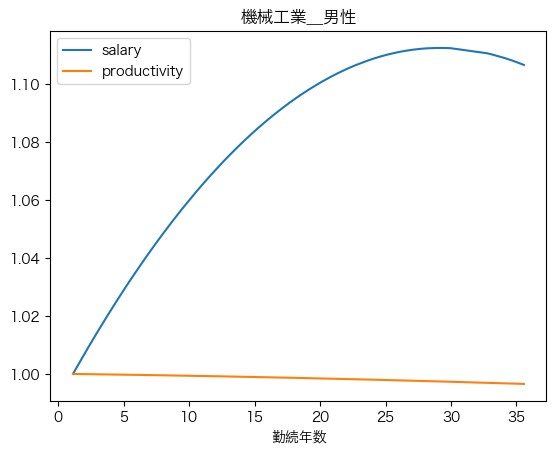

In [54]:
fig = plt.figure()
ax = plt.subplot(111)
plt.plot(x_hats,sal_lis,label = 'salary')
plt.plot(x_hats,pro_lis,label = 'productivity') #y(n)/y(0)
plt.title('機械工業＿男性')
plt.xlabel('勤続年数')

plt.legend()

fig.savefig('機械工業＿男性.png')

In [55]:
hiseiki_male = male_data['hiseiki']
s_p = salary_hats - pro_hats

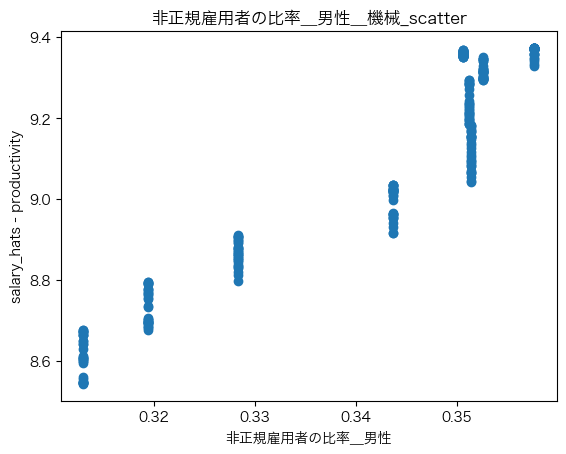

In [56]:
fig = plt.figure()
ax = plt.subplot(111)
plt.scatter(hiseiki_male,s_p)
plt.xlabel('非正規雇用者の比率＿男性')
plt.ylabel('salary_hats - productivity')
plt.title('非正規雇用者の比率＿男性＿機械_scatter')

plt.savefig('非正規雇用者の比率＿男性＿機械_scatter')

# graph(female)

In [57]:
kinzoku_p_f = female_pro_res.params[1]
kinzoku_square_p_f = female_pro_res.params[2]
const_p_f = female_pro_res.params[0]

In [58]:
kinzoku_s_f = female_salary_res.params[1]
kinzoku_square_s_f = female_salary_res.params[2]
const_s_f = female_salary_res.params[0]

In [59]:
f_salary_f =lambda x: kinzoku_s_f * x + kinzoku_square_s_f * (x**2) + const_s_f
f_pro_f = lambda x : kinzoku_p_f * x + kinzoku_square_p_f * (x**2) + const_p_f


In [60]:
x_hats_f = female_data['勤続年数']
x_hats_f = np.sort(x_hats_f)

In [61]:
salary_hats_f = f_salary_f(np.array(x_hats_f))
pro_hats_f = f_pro_f(np.array(x_hats_f))

In [62]:
pro_lis_f = []
for ind in range(len(pro_hats_f)):
    res = pro_hats_f[ind]/pro_hats_f[0]
    pro_lis_f.append(res)
    

In [63]:
sal_lis_f = []
for ind in range(len(salary_hats_f)):
    res = salary_hats_f[ind]/salary_hats_f[0]
    sal_lis_f.append(res)

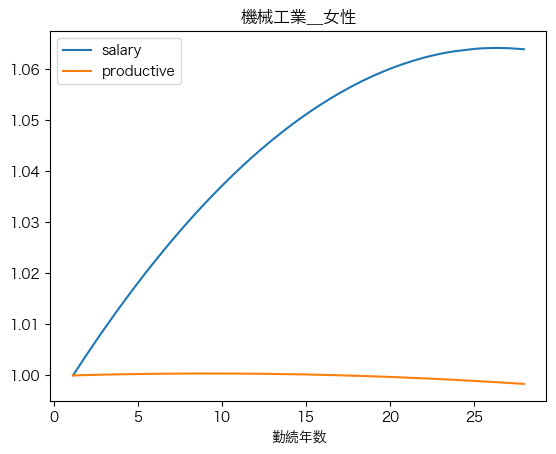

In [64]:
fig = plt.figure()
ax = plt.subplot(111)
plt.plot(x_hats_f,sal_lis_f,label = 'salary')
plt.plot(x_hats_f,pro_lis_f,label = 'productive') #y(n)/y(0)
plt.title('機械工業＿女性')
plt.xlabel('勤続年数')
plt.legend()


fig.savefig('機械工業＿女性.png')

In [65]:
hiseiki_female = female_data['hiseiki']
s_p_f = salary_hats_f - pro_hats_f

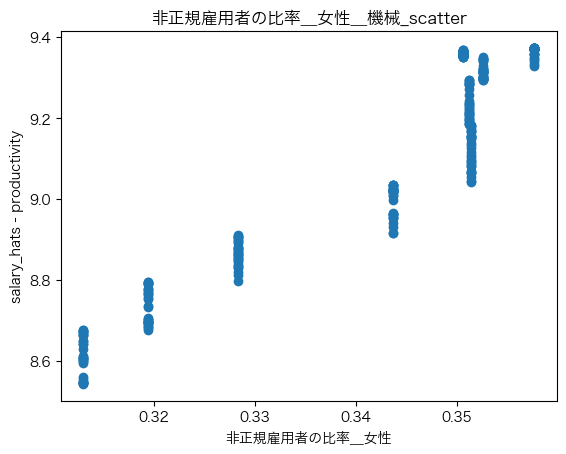

In [66]:
fig = plt.figure()
ax = plt.subplot(111)


plt.scatter(hiseiki_female,s_p)
plt.xlabel('非正規雇用者の比率＿女性')
plt.ylabel('salary_hats - productivity')
plt.title('非正規雇用者の比率＿女性＿機械_scatter')

plt.savefig('非正規雇用者の比率＿女性_scatter')

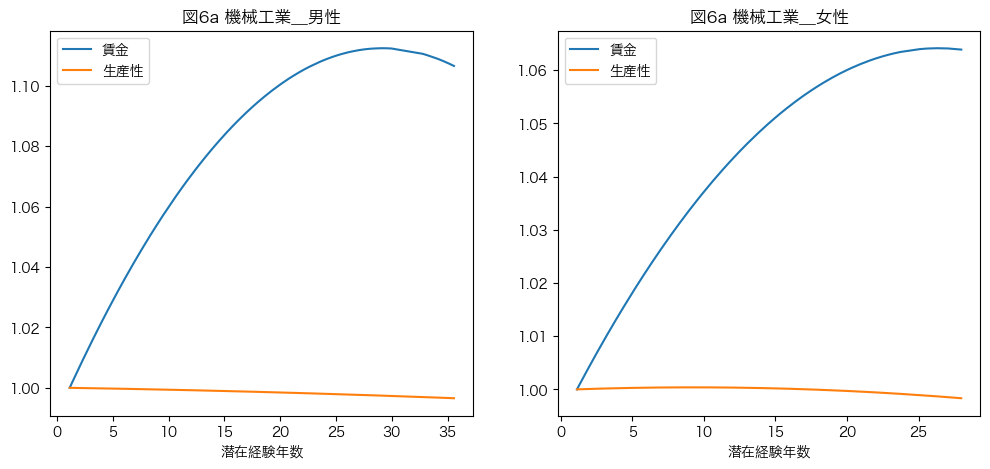

In [67]:
fig = plt.figure(figsize=(12,5))

ax1 = plt.subplot(121)

plt.plot(x_hats,sal_lis,label = '賃金')
plt.plot(x_hats,pro_lis,label = '生産性') #y(n)/y(0)
plt.title('図6a 機械工業＿男性')
plt.xlabel('潜在経験年数')
plt.legend()

ax2 = plt.subplot(122)
plt.plot(x_hats_f,sal_lis_f,label = '賃金')
plt.plot(x_hats_f,pro_lis_f,label = '生産性') #y(n)/y(0)
plt.title('図6a 機械工業＿女性')
plt.xlabel('潜在経験年数')
plt.legend()

plt.savefig('機械工業.png')

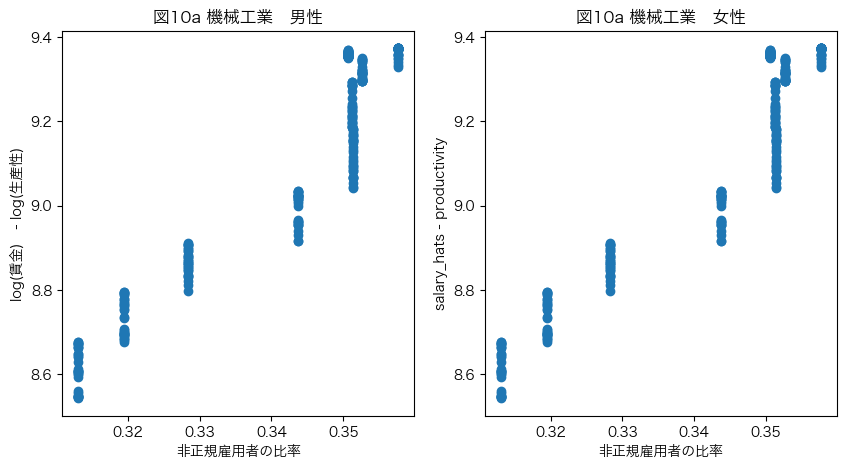

In [71]:
fig = plt.figure(figsize = (10,5))
ax = plt.subplot(121)
plt.scatter(hiseiki_male,s_p)
plt.xlabel('非正規雇用者の比率')
plt.ylabel('log(賃金)　- log(生産性)')
plt.title('図10a 機械工業　男性')

ax2 = plt.subplot(122)
plt.scatter(hiseiki_female,s_p)
plt.xlabel('非正規雇用者の比率')
plt.ylabel('salary_hats - productivity')
plt.title('図10a 機械工業　女性')

plt.savefig('図10')